# Libraries

In [1]:
!pip3 install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=a65d089b008902d92f5ec5914ad79d36fad09c5232862688049de148a7b5ea0d
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [2]:
import pyforest
from datetime import datetime
from datetime import date, timedelta
from category_encoders import TargetEncoder
from lightgbm import LGBMRegressor


plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

<IPython.core.display.Javascript object>

# Load Data

In [3]:
train = pd.read_csv('../input/adb-task-2/train_npf2.csv')
train

<IPython.core.display.Javascript object>

,Unnamed: 0,index,product_rk,store_location_rk,date,demand,PRODUCT_RK,STORE_LOCATION_RK,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,43,43,19540,309,2016-12-26,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,44,19540,355,2016-12-19,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,45,19540,355,2017-01-02,0.027027,19540,355.0,1.0,0.0,2849.000000,1709.40,0.0,1.0
3,46,46,19540,355,2017-03-27,1.000000,19540,355.0,0.0,0.0,2856.142857,1782.02,0.0,1.0
4,47,47,19540,355,2018-01-01,0.002740,19540,355.0,1.0,0.0,2899.000000,2217.74,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193901,209593,209593,98432,1316,2019-11-25,NaN,98432,1316.0,1.0,0.0,2049.000000,1024.50,0.0,1.0
193902,209594,209594,98445,1316,2019-11-25,NaN,98445,1316.0,1.0,0.0,3299.000000,989.70,0.0,1.0
193903,209595,209595,98470,1316,2019-11-25,NaN,98470,1316.0,1.0,0.0,3049.000000,914.70,0.0,1.0
193904,209596,209596,98475,1316,2019-11-25,NaN,98475,1316.0,1.0,0.0,3049.000000,914.70,0.0,1.0


In [4]:
sample_sub = pd.read_csv('../input/adb-task-2/sample_npf2.csv')
sample_sub

<IPython.core.display.Javascript object>

,index,demand
0,902,0.0
1,1163,0.0
2,1167,0.0
3,1172,0.0
4,1202,0.0
...,...,...
523,209593,0.0
524,209594,0.0
525,209595,0.0
526,209596,0.0


In [5]:
ind = sample_sub['index'].tolist()
test = train[train['index'].isin(ind)].copy()
test

,Unnamed: 0,index,product_rk,store_location_rk,date,demand,PRODUCT_RK,STORE_LOCATION_RK,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
817,902,902,19544,1363,2019-11-04,NaN,19544,1363.0,1.0,0.0,2999.0,899.700000,0.0,1.0
1039,1163,1163,19545,1380,2019-11-04,NaN,19545,1380.0,1.0,0.0,2999.0,2142.142857,0.0,1.0
1043,1167,1167,19545,1380,2019-11-18,NaN,19545,1380.0,1.0,0.0,2999.0,1499.500000,0.0,1.0
1048,1172,1172,19545,1380,2019-11-25,NaN,19545,1380.0,1.0,0.0,2999.0,1499.500000,0.0,1.0
1065,1202,1202,135955,1326,2019-11-04,NaN,135955,1326.0,1.0,0.0,2999.0,1499.500000,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193901,209593,209593,98432,1316,2019-11-25,NaN,98432,1316.0,1.0,0.0,2049.0,1024.500000,0.0,1.0
193902,209594,209594,98445,1316,2019-11-25,NaN,98445,1316.0,1.0,0.0,3299.0,989.700000,0.0,1.0
193903,209595,209595,98470,1316,2019-11-25,NaN,98470,1316.0,1.0,0.0,3049.0,914.700000,0.0,1.0
193904,209596,209596,98475,1316,2019-11-25,NaN,98475,1316.0,1.0,0.0,3049.0,914.700000,0.0,1.0


In [6]:
index_answer = test['index'].tolist()

In [7]:
ind = sample_sub['index'].tolist()
train = train[np.logical_not(train['index'].isin(ind))].copy()
train

<IPython.core.display.Javascript object>

,Unnamed: 0,index,product_rk,store_location_rk,date,demand,PRODUCT_RK,STORE_LOCATION_RK,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,43,43,19540,309,2016-12-26,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,44,19540,355,2016-12-19,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,45,19540,355,2017-01-02,0.027027,19540,355.0,1.0,0.0,2849.000000,1709.40,0.0,1.0
3,46,46,19540,355,2017-03-27,1.000000,19540,355.0,0.0,0.0,2856.142857,1782.02,0.0,1.0
4,47,47,19540,355,2018-01-01,0.002740,19540,355.0,1.0,0.0,2899.000000,2217.74,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193884,209576,209576,137670,1347,2019-09-16,0.000000,137670,1347.0,0.0,0.0,NaN,NaN,0.0,1.0
193885,209577,209577,137670,1316,2019-09-23,0.000000,137670,1316.0,0.0,0.0,NaN,NaN,0.0,1.0
193886,209578,209578,137670,1326,2019-09-23,0.000000,137670,1326.0,0.0,0.0,NaN,NaN,0.0,1.0
193887,209579,209579,98447,1316,2019-09-23,1.000000,98447,1316.0,1.0,0.0,3299.000000,NaN,0.0,1.0


In [8]:
to_drop = ['Unnamed: 0', 'index']
train.drop(columns=to_drop, inplace=True)
test.drop(columns=to_drop, inplace=True)

train = train[train['demand'].notna()].copy()
train

,product_rk,store_location_rk,date,demand,PRODUCT_RK,STORE_LOCATION_RK,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,19540,309,2016-12-26,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19540,355,2016-12-19,1.000000,19540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19540,355,2017-01-02,0.027027,19540,355.0,1.0,0.0,2849.000000,1709.40,0.0,1.0
3,19540,355,2017-03-27,1.000000,19540,355.0,0.0,0.0,2856.142857,1782.02,0.0,1.0
4,19540,355,2018-01-01,0.002740,19540,355.0,1.0,0.0,2899.000000,2217.74,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
193884,137670,1347,2019-09-16,0.000000,137670,1347.0,0.0,0.0,NaN,NaN,0.0,1.0
193885,137670,1316,2019-09-23,0.000000,137670,1316.0,0.0,0.0,NaN,NaN,0.0,1.0
193886,137670,1326,2019-09-23,0.000000,137670,1326.0,0.0,0.0,NaN,NaN,0.0,1.0
193887,98447,1316,2019-09-23,1.000000,98447,1316.0,1.0,0.0,3299.000000,NaN,0.0,1.0


# Data Analysis

In [9]:
train.dtypes

product_rk             int64
store_location_rk      int64
date                  object
demand               float64
PRODUCT_RK             int64
STORE_LOCATION_RK    float64
PROMO1_FLAG          float64
PROMO2_FLAG          float64
PRICE_REGULAR        float64
PRICE_AFTER_DISC     float64
NUM_CONSULTANT       float64
AUTORIZATION_FLAG    float64
dtype: object

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187273 entries, 0 to 193888
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   product_rk         187273 non-null  int64  
 1   store_location_rk  187273 non-null  int64  
 2   date               187273 non-null  object 
 3   demand             187273 non-null  float64
 4   PRODUCT_RK         187273 non-null  int64  
 5   STORE_LOCATION_RK  185608 non-null  float64
 6   PROMO1_FLAG        185608 non-null  float64
 7   PROMO2_FLAG        185608 non-null  float64
 8   PRICE_REGULAR      183565 non-null  float64
 9   PRICE_AFTER_DISC   181921 non-null  float64
 10  NUM_CONSULTANT     185608 non-null  float64
 11  AUTORIZATION_FLAG  185608 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 18.6+ MB


In [11]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_rk,187273.0,55970.435733,36101.373388,19540.0,20968.000000,22276.000000,93246.0,140615.0
store_location_rk,187273.0,914.932708,343.596796,309.0,557.000000,874.000000,1281.0,1380.0
demand,187273.0,0.584657,0.732653,0.0,0.076087,0.268571,1.0,29.0
PRODUCT_RK,187273.0,55970.435733,36101.373388,19540.0,20968.000000,22276.000000,93246.0,140615.0
STORE_LOCATION_RK,185608.0,916.494251,343.370843,317.0,557.000000,874.000000,1281.0,1380.0
PROMO1_FLAG,185608.0,0.587744,0.542161,0.0,0.000000,1.000000,1.0,2.0
PROMO2_FLAG,185608.0,0.003723,0.060902,0.0,0.000000,0.000000,0.0,1.0
PRICE_REGULAR,183565.0,2326.133735,818.336801,81.0,1605.571429,2349.000000,2999.0,5199.0
PRICE_AFTER_DISC,181921.0,1584.741663,629.496672,1.0,1161.750000,1499.000000,1919.4,4599.0
NUM_CONSULTANT,185608.0,0.538064,1.488004,0.0,0.000000,0.000000,0.0,7.0


In [12]:
del train['PRODUCT_RK']
del train['STORE_LOCATION_RK']
del test['PRODUCT_RK']
del test['STORE_LOCATION_RK']

In [13]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_rk,528.0,116074.626894,30231.066493,19544.0,98495.000000,132543.0,137645.0,145765.000000
store_location_rk,528.0,1015.696970,358.363827,317.0,642.250000,1185.0,1328.0,1380.000000
demand,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROMO1_FLAG,528.0,1.000000,0.000000,1.0,1.000000,1.0,1.0,1.000000
PROMO2_FLAG,528.0,0.081439,0.273768,0.0,0.000000,0.0,0.0,1.000000
PRICE_REGULAR,454.0,2389.590308,955.950614,529.0,1749.000000,2349.0,3336.5,4049.000000
PRICE_AFTER_DISC,454.0,1202.285630,564.040316,299.7,766.828571,1174.5,1724.5,3370.428571
NUM_CONSULTANT,528.0,0.500000,1.435521,0.0,0.000000,0.0,0.0,6.000000
AUTORIZATION_FLAG,528.0,0.979167,0.142962,0.0,1.000000,1.0,1.0,1.000000


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 817 to 193905
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_rk         528 non-null    int64  
 1   store_location_rk  528 non-null    int64  
 2   date               528 non-null    object 
 3   demand             0 non-null      float64
 4   PROMO1_FLAG        528 non-null    float64
 5   PROMO2_FLAG        528 non-null    float64
 6   PRICE_REGULAR      454 non-null    float64
 7   PRICE_AFTER_DISC   454 non-null    float64
 8   NUM_CONSULTANT     528 non-null    float64
 9   AUTORIZATION_FLAG  528 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 45.4+ KB


In [15]:
del test['demand']

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


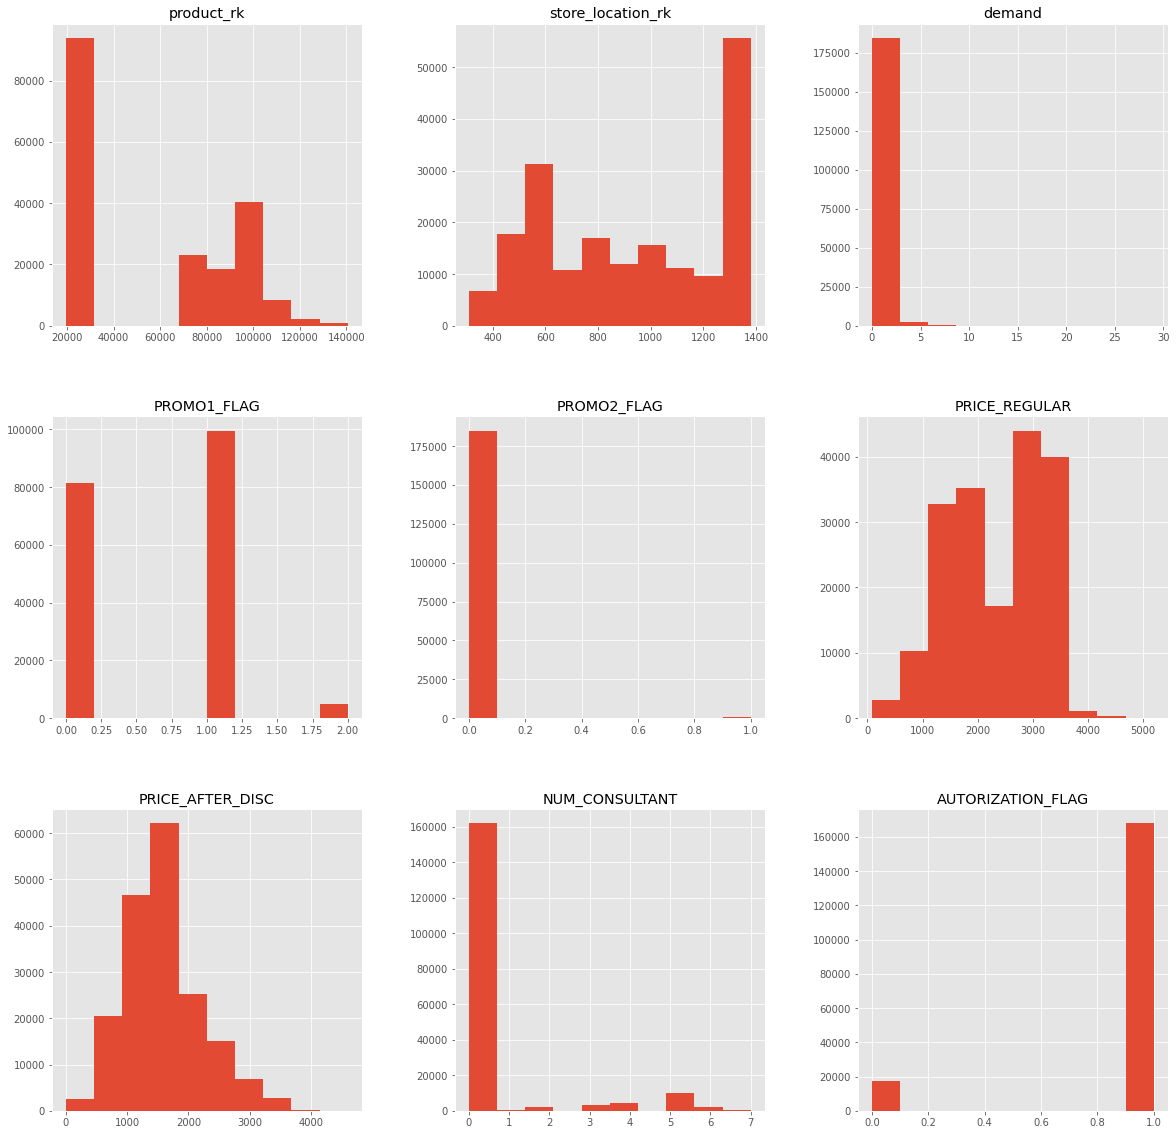

In [16]:
_ = train.hist(figsize=(20,20))

In [17]:
train.nunique()

product_rk             894
store_location_rk       41
date                   147
demand               17306
PROMO1_FLAG              3
PROMO2_FLAG              2
PRICE_REGULAR         1991
PRICE_AFTER_DISC     11693
NUM_CONSULTANT           8
AUTORIZATION_FLAG        2
dtype: int64

In [18]:
train.isna().sum()

product_rk              0
store_location_rk       0
date                    0
demand                  0
PROMO1_FLAG          1665
PROMO2_FLAG          1665
PRICE_REGULAR        3708
PRICE_AFTER_DISC     5352
NUM_CONSULTANT       1665
AUTORIZATION_FLAG    1665
dtype: int64

In [19]:
fill_zero = ['PROMO1_FLAG', 'PROMO2_FLAG', 'NUM_CONSULTANT', 'AUTORIZATION_FLAG']
fill_median = []
fill_mean = ['PRICE_REGULAR', 'PRICE_AFTER_DISC']

def fill_nans(df, zrs, mds, mns):
    for el in mds:
        df[el].fillna(np.median(df[el]), inplace=True)
    for el in mns:
        df[el].fillna(np.mean(df[el]), inplace=True)
    for el in zrs:
        df[el].fillna(0, inplace=True)
    df.fillna(-1, inplace=True)
    

fill_nans(train, fill_zero, fill_median, fill_mean)
for el in fill_mean:
    test[el].fillna(np.mean(test[el]), inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
train.isna().sum()

product_rk           0
store_location_rk    0
date                 0
demand               0
PROMO1_FLAG          0
PROMO2_FLAG          0
PRICE_REGULAR        0
PRICE_AFTER_DISC     0
NUM_CONSULTANT       0
AUTORIZATION_FLAG    0
dtype: int64

In [21]:
train.dtypes

product_rk             int64
store_location_rk      int64
date                  object
demand               float64
PROMO1_FLAG          float64
PROMO2_FLAG          float64
PRICE_REGULAR        float64
PRICE_AFTER_DISC     float64
NUM_CONSULTANT       float64
AUTORIZATION_FLAG    float64
dtype: object

In [22]:
def transform_date(df):
    df['date_'] = df['date'].apply(pd.to_datetime)
    df['day_of_year'] = df['date_'].apply(lambda x : x.dayofyear)
    df['month'] = df['date_'].apply(lambda x : x.month)
    df['day_of_week'] = df['date_'].apply(lambda x : x.weekday())
    df['week_of_year'] = df['date_'].apply(lambda x : x.weekofyear)
    df['year'] = df['date_'].apply(lambda x : x.year)

transform_date(train)
transform_date(test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
train['date_'] = train['date_'].apply(lambda x: x.date())
test['date_'] = test['date_'].apply(lambda x: x.date())

In [24]:
train.dtypes

product_rk             int64
store_location_rk      int64
date                  object
demand               float64
PROMO1_FLAG          float64
PROMO2_FLAG          float64
PRICE_REGULAR        float64
PRICE_AFTER_DISC     float64
NUM_CONSULTANT       float64
AUTORIZATION_FLAG    float64
date_                 object
day_of_year            int64
month                  int64
day_of_week            int64
week_of_year           int64
year                   int64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

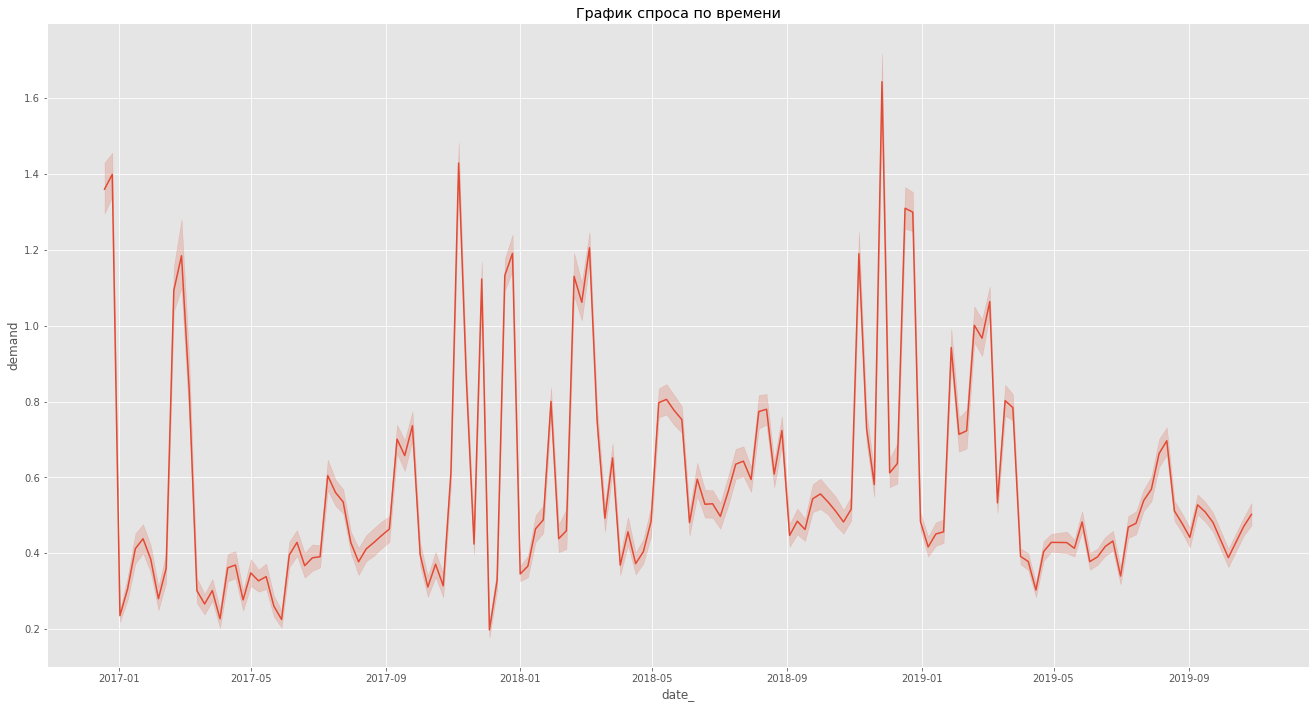

In [25]:
#sns.set(rc={'figure.figsize':(30,10)})
g = sns.relplot(data=train, x='date_', y='demand', kind='line',)
g.fig.set_size_inches(20,10)
_ = plt.title('График спроса по времени')

<IPython.core.display.Javascript object>

(array([145.,   0.,   0., 126.,   0.,   0., 127.,   0.,   0., 130.]),
 array([18204. , 18206.1, 18208.2, 18210.3, 18212.4, 18214.5, 18216.6,
        18218.7, 18220.8, 18222.9, 18225. ]),
 <BarContainer object of 10 artists>)

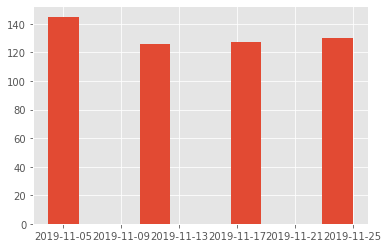

In [26]:
plt.hist(test.date_)

In [27]:
sorted(test.date_.unique().tolist())

[datetime.date(2019, 11, 4),
 datetime.date(2019, 11, 11),
 datetime.date(2019, 11, 18),
 datetime.date(2019, 11, 25)]

In [28]:
train['demand_for_week'] = 0
for el in train['year'].unique().tolist():
    sup = train[train['year'] == el][['week_of_year', 'demand']].groupby(by='week_of_year').sum()
    sup = dict(zip(sup.index.tolist(), sup.demand)) 
    for key, val in sup.items():
        train.loc[(train['year'] == el) & (train['week_of_year'] == key), 'demand_for_week'] = val

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'График суммарного спроса за неделю')

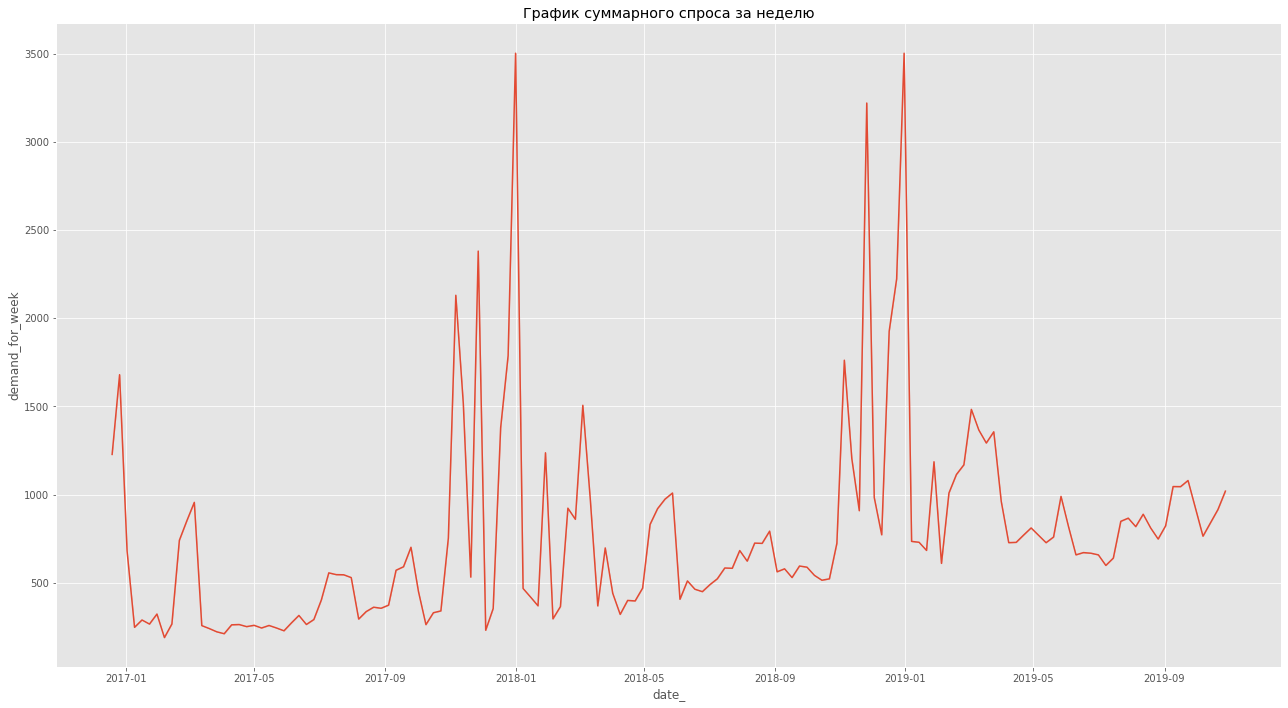

In [29]:
g = sns.relplot(data=train, x='date_', y='demand_for_week', kind='line',)
g.fig.set_size_inches(20,10)
plt.title('График суммарного спроса за неделю')

In [30]:
train['peaks'] = train['demand_for_week'].apply(lambda x: 1 if x > 1400 else 0)

In [31]:
tmp = train[train['peaks'] == 1].copy()
peak_dates = set(tmp['date_'].tolist()) 
sorted(peak_dates)

[datetime.date(2016, 12, 26),
 datetime.date(2017, 11, 6),
 datetime.date(2017, 11, 13),
 datetime.date(2017, 11, 27),
 datetime.date(2017, 12, 25),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 3, 5),
 datetime.date(2018, 11, 5),
 datetime.date(2018, 11, 26),
 datetime.date(2018, 12, 17),
 datetime.date(2018, 12, 24),
 datetime.date(2018, 12, 31),
 datetime.date(2019, 3, 4)]

In [32]:
test['peaks'] = 1

In [33]:
reg_mean = train[['store_location_rk', 'demand']].groupby(by='store_location_rk').mean().sort_values(by='demand')
reg_mean

,demand
store_location_rk,
644,0.382868
1202,0.383237
517,0.389279
862,0.404768
874,0.414673
1185,0.419681
1191,0.420124
533,0.426203
866,0.432126


In [34]:
def get_type_reg(x):
    if x >= 0.70:
        return 5
    elif x >= 0.50:
        return 3
#     elif x >= 2000:
#         return 1
    return 1
        
reg_mean['type'] = reg_mean['demand'].apply(get_type_reg)

regs = dict(zip(reg_mean.index.tolist(), reg_mean['type'].tolist()))
train['reg_type'] = train['store_location_rk'].apply(lambda x: regs[x] if x in regs else 0)
test['reg_type'] = test['store_location_rk'].apply(lambda x: regs[x] if x in regs else 0)

In [35]:
sup = train[['product_rk', 'store_location_rk', 'date_']].groupby(by=['product_rk', 'store_location_rk']).min()
sup = sup.sort_values('date_')
sup

date_
product_rk store_location_rk            
91374      557                2016-12-19
20940      1143               2016-12-19
           1005               2016-12-19
           862                2016-12-19
           798                2016-12-19
...                                  ...
98858      657                2019-10-28
88576      525                2019-10-28
88236      355                2019-10-28
93020      557                2019-10-28
132543     1281               2019-10-28

[14797 rows x 1 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<IPython.core.display.Javascript object>

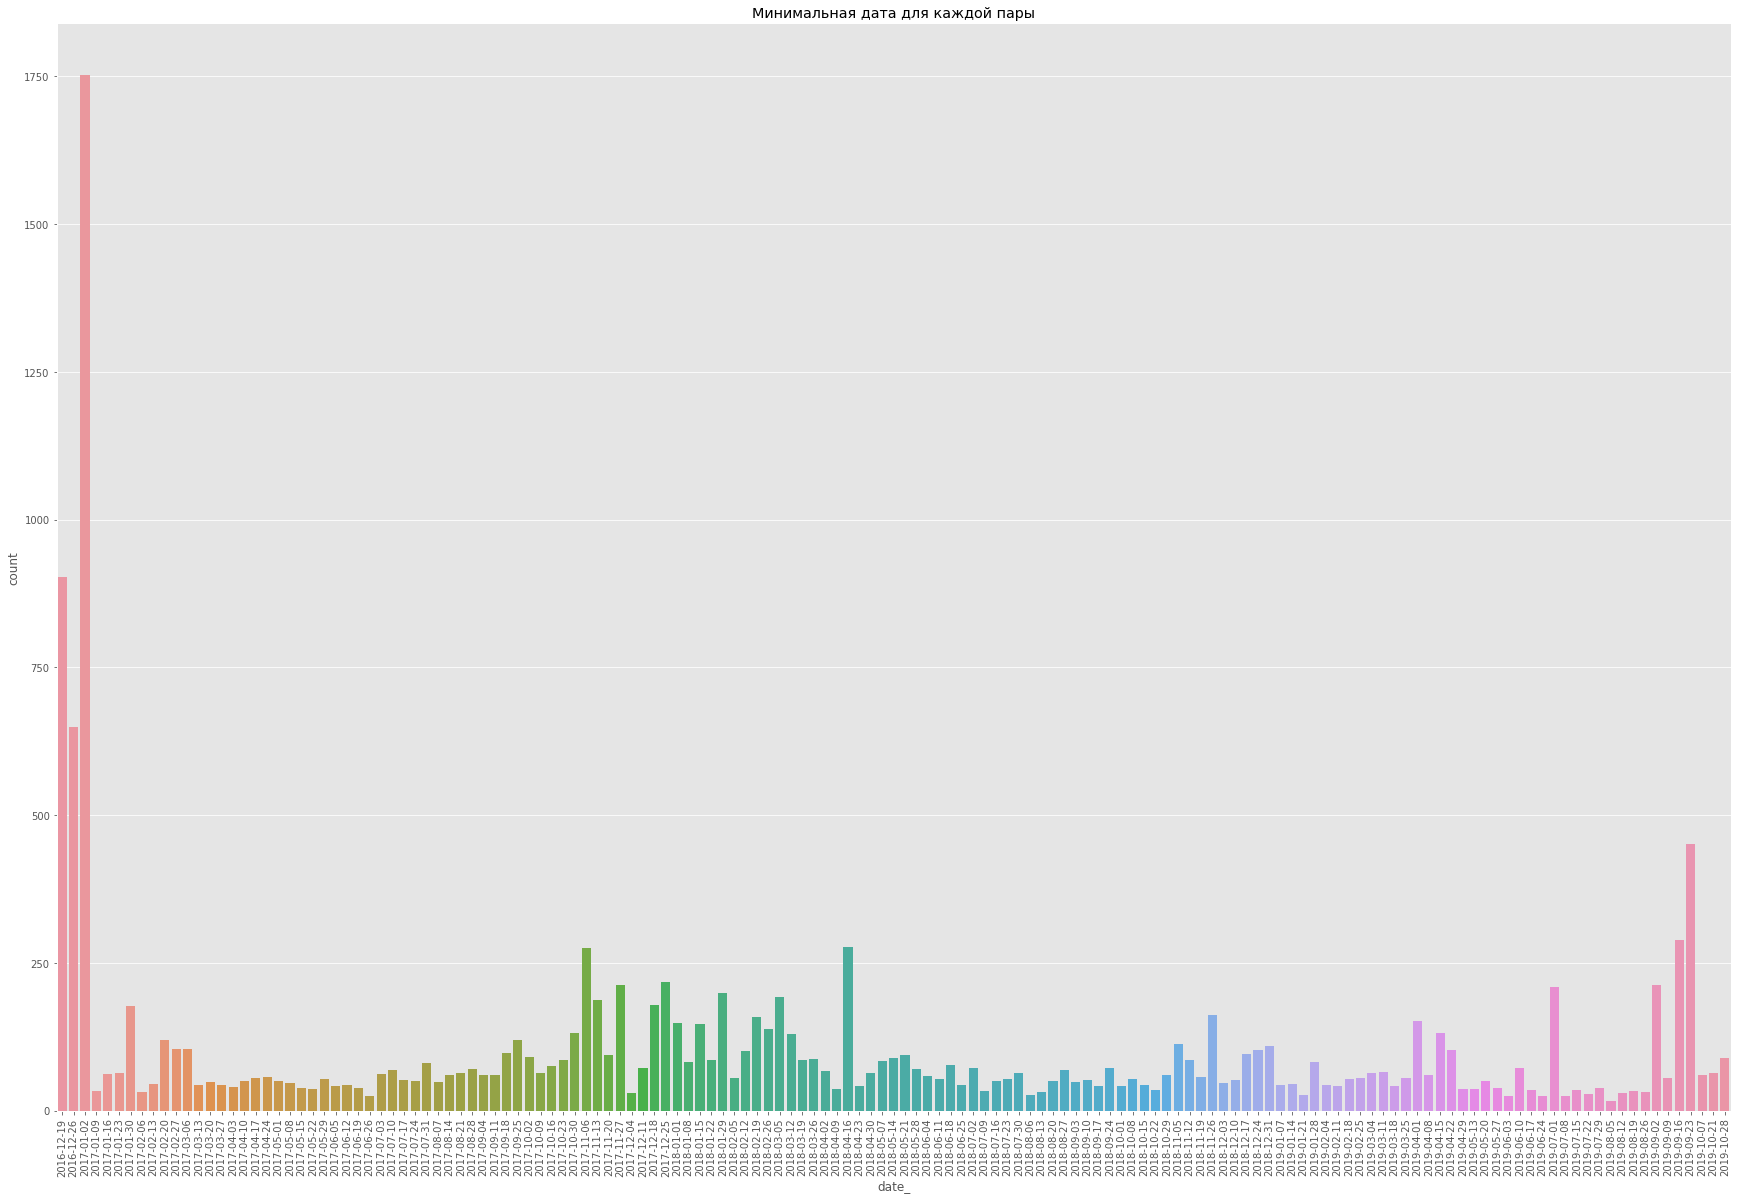

In [36]:
sup = train[['product_rk', 'store_location_rk', 'date_']].groupby(by=['product_rk', 'store_location_rk']).min()
sup = sup.sort_values('date_')
plt.figure(figsize=(30,20))
ax = sns.countplot(sup['date_'])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
_ = plt.title('Минимальная дата для каждой пары')

In [37]:
sup = sup[sup['date_'] >= date(2017, 1, 9)].copy()

In [38]:
time_dict = dict(zip(sup.index.tolist(), zip(sup.date_.tolist(), (sup.date_ + timedelta(days=24)).tolist())))
def func(x, sup):
    if (x.product_rk, x.store_location_rk) in sup:
        el = sup[(x.product_rk, x.store_location_rk)]
        if el[0] <= x.date_ <= el[1]:
            return 1
        else:
            return 0
    return 0

train['take'] = 0
train['take'] = train.apply(func, args=[time_dict], axis=1)

In [39]:
train = train[train['take'] == 1].copy()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


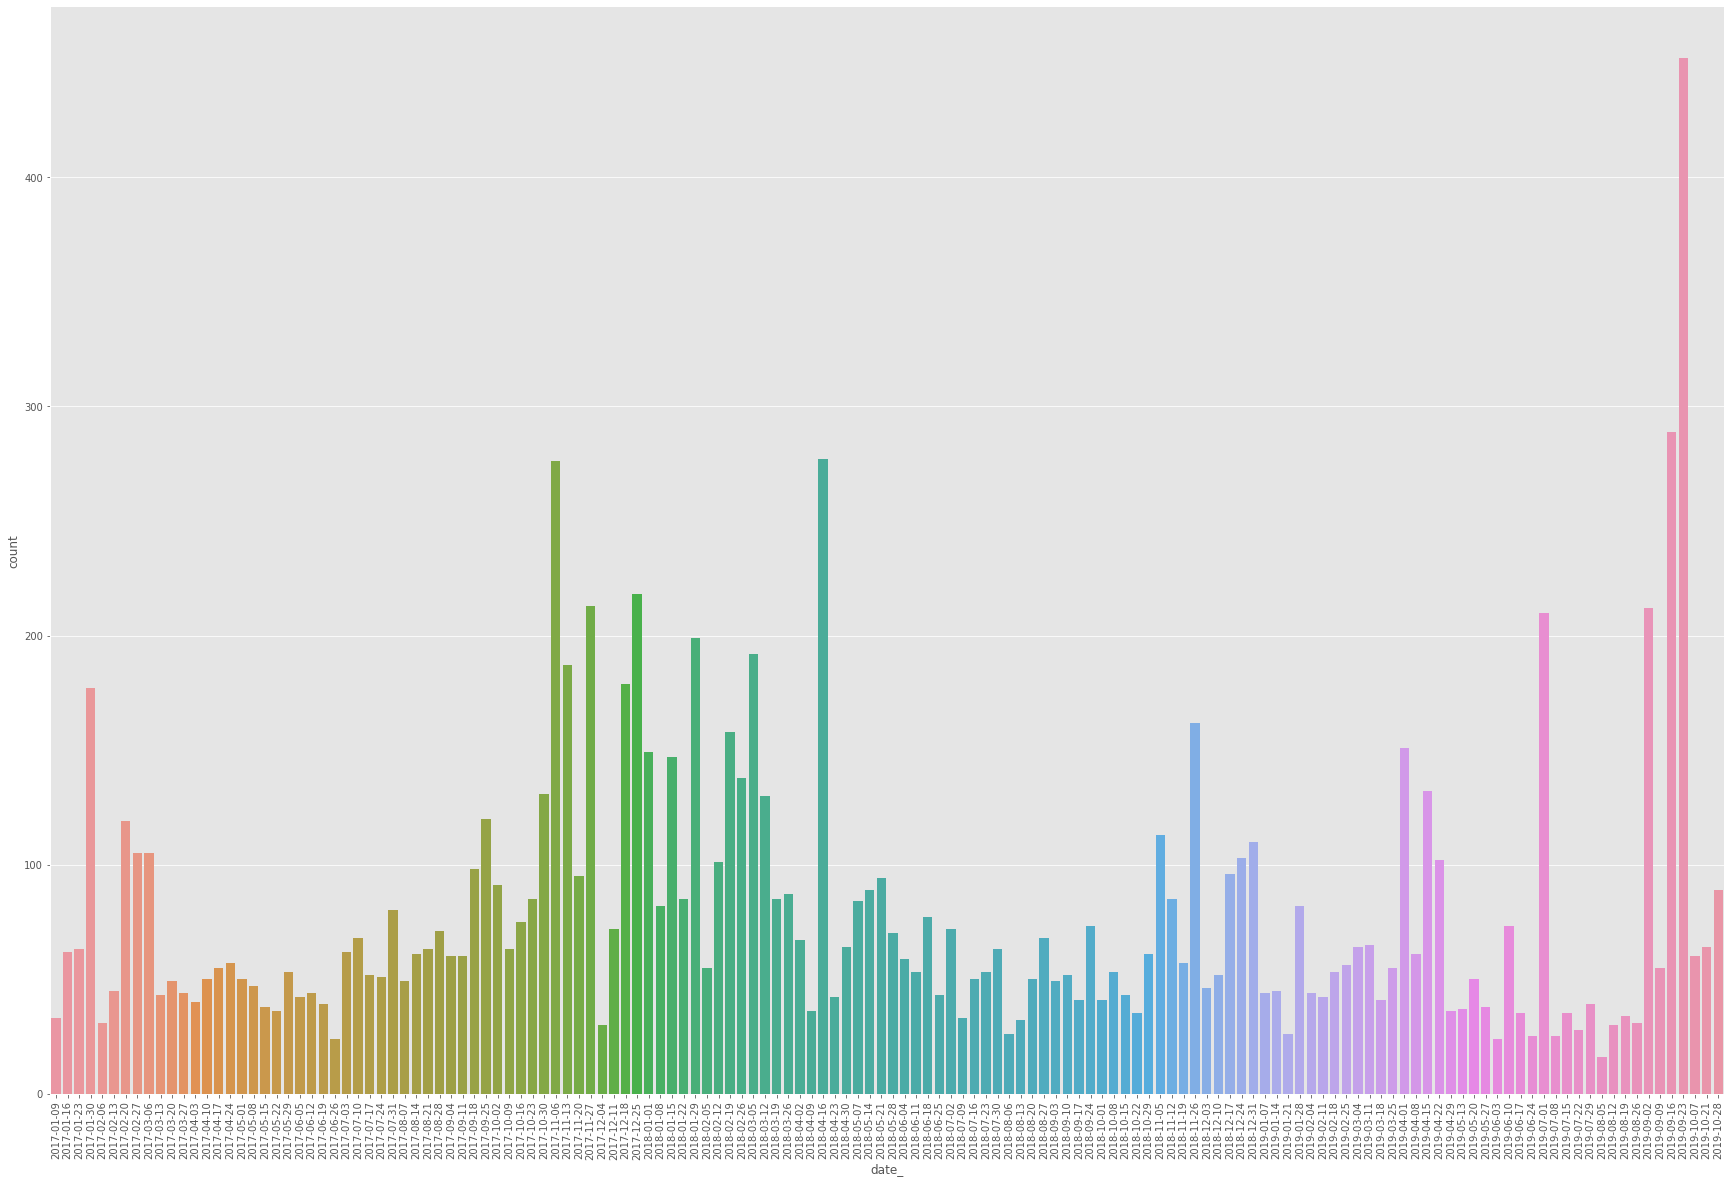

In [40]:
sup = train[['product_rk', 'store_location_rk', 'date_']].groupby(by=['product_rk', 'store_location_rk']).min()
sup = sup.sort_values('date_')
plt.figure(figsize=(30,20))
ax = sns.countplot(sup['date_'])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

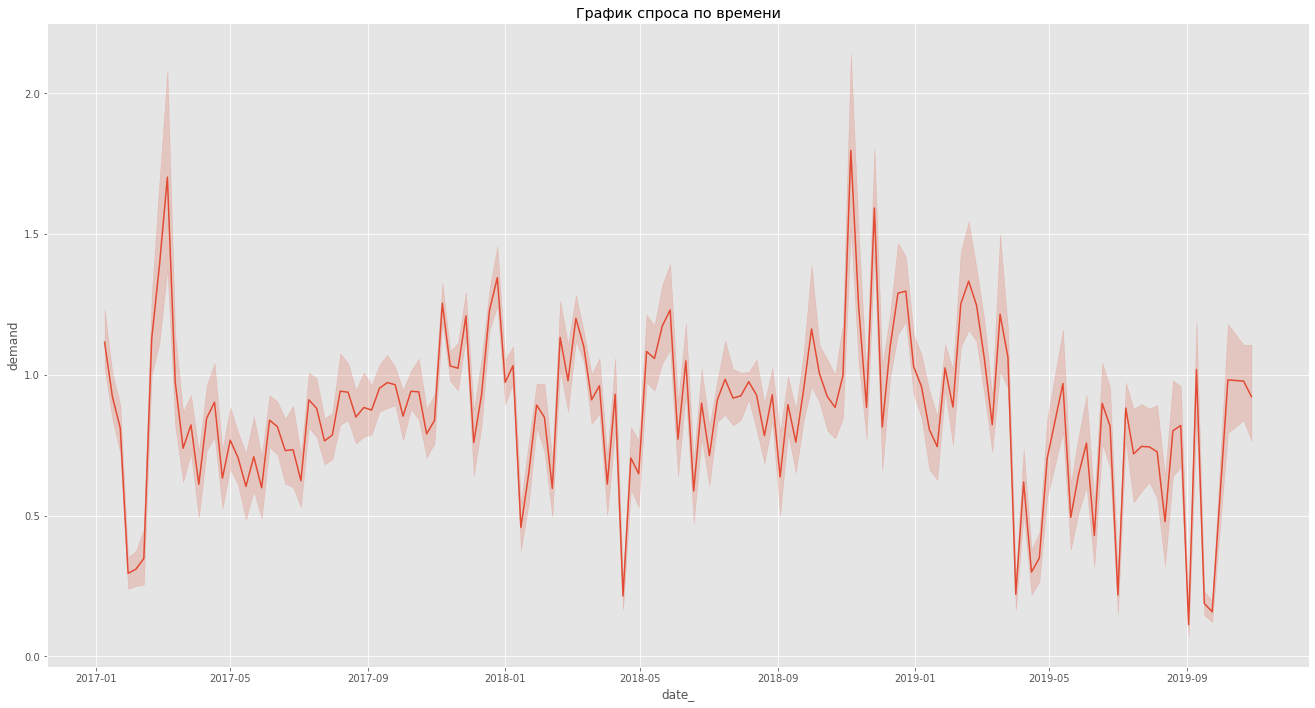

In [41]:
g = sns.relplot(data=train, x='date_', y='demand', kind='line',)
g.fig.set_size_inches(20,10)
_ = plt.title('График спроса по времени')

# Modeling

In [42]:
cats = ['product_rk', 'store_location_rk']

to_del = ['demand_for_week', 'date', 'date_']
train.drop(columns=to_del, inplace=True)

In [43]:
del test['date']
del test['date_']
del train['take']

target = train['demand']
del train['demand']

In [44]:
train.columns

Index(['product_rk', 'store_location_rk', 'PROMO1_FLAG', 'PROMO2_FLAG',
       'PRICE_REGULAR', 'PRICE_AFTER_DISC', 'NUM_CONSULTANT',
       'AUTORIZATION_FLAG', 'day_of_year', 'month', 'day_of_week',
       'week_of_year', 'year', 'peaks', 'reg_type'],
      dtype='object')

In [45]:
encoder = TargetEncoder(cols=cats)
#numeric
train = encoder.fit_transform(train, target).copy()
test = encoder.transform(test).copy()

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [46]:
regressor =LGBMRegressor().fit(train, target)
y_pred = regressor.predict(test)

In [47]:
answer = dict(zip(index_answer, y_pred.tolist()))
sample_sub['demand'] = sample_sub['index'].apply(lambda x: answer[x])

In [48]:
sample_sub

,index,demand
0,902,1.129661
1,1163,1.103364
2,1167,1.017077
3,1172,1.256426
4,1202,0.983806
...,...,...
523,209593,1.128121
524,209594,1.186195
525,209595,1.183447
526,209596,1.183447


In [49]:
sample_sub.to_csv("task_2.csv", index = False)